In [67]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import plotly.express as ex

In [2]:
# 빵소 (https://pangpangday.co.kr/bbs/board.php?bo_table=b302)
pan_data = [
    {'name':'꼬망스케익', 'addr':'천안 서북구 봉정로 362'}, # 31103
    {'name':'듀팡과자점', 'addr':'천안 서북구 늘푸른5길 22'},
    {'name':'뚜쥬루돌가마점', 'addr':'천안 동남구 풍세로 706'},
    {'name':'못난이꽈배기', 'addr':'천안 동남구 사직로 10-6'},
    {'name':'몽상가인', 'addr':'천안 서북구 쌍용대로 85'},  # 31155
    {'name':'브레드보드', 'addr':'천안 동남구 성남면 종합휴양지로 183'},
    {'name':'쁘띠빠리', 'addr':'천안 서북구 한들3로 88'},
    {'name':'수제빵연구소', 'addr':'천안 서북구 백석3로 35'},
    {'name':'슈에뜨베이커리', 'addr':'천안 동남구 서부대로 226-12'},
    {'name':'시바앙과자점', 'addr':'천안 동남구 충절로 42'}, # 경남아너스빌상가
    {'name':'엘림제과', 'addr':'천안 동남구 병천면 충절로 1747'},
    {'name':'주식회사 호도원본점', 'addr':'천안 동남구 만남로 126'},
    {'name':'지씨브레드', 'addr':'천안 동남구 유량로 196'},
    {'name':'천안당호두과자남천안점', 'addr':'천안 동남구 천안대로 87'}, # 목천읍
    {'name':'천안옛날호두과자본점', 'addr':'천안 동남구 광풍로 1739'},  #  1층 (구룡동)
    {'name':'파스텔베이커리', 'addr':'천안 동남구 신부4길 24-5'},
    {'name':'할머니 학화호도과자 본점', 'addr':'천안 동남구 만남로 62'},
]

pan_df = pd.DataFrame(pan_data)

In [3]:
# 폐건물
building_data = [
    {'name':'두정동 폐공사장', 'addr':'충남 천안시 서북구 두정동 1354'},
    {'name':'쌍용동 폐공장', 'addr':'천안시 서북구 충무로 214'},
    {'name':'삼룡동 폐건물', 'addr':'천안시 동남구 삼룡동 240-3'}
]

building_df = pd.DataFrame(building_data)

In [4]:
# 교통 인프라
infra_data = [
    {'name':'천안역 1호선', 'addr':'천안 동남구 대흥로 239'},
    {'name':'천안아산역', 'addr':'충청남도 아산시 배방읍 희망로 100'},
    {'name':'천안고속버스터미널', 'addr':'천안 동남구 만남로 43'},
    {'name':'두정역', 'addr':'천안 서북구 두정로 289'},
    {'name':'봉명역', 'addr':'천안 동남구 차돌로 51'},
    {'name':'쌍용역', 'addr':'천안 서북구 쌍용19로 20'},
]

infra_df = pd.DataFrame(infra_data)

In [5]:
# naver map api: geocode
def find_XY(addr):
    client_id = ""
    client_secret = ""

    endpoint = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode"
    url = f"{endpoint}?query={addr}"

    # 헤더
    headers = {
        "X-NCP-APIGW-API-KEY-ID": client_id,
        "X-NCP-APIGW-API-KEY": client_secret,
    }

    # 요청
    response = requests.get(url, headers=headers)
    tmp = response.json()

    long = tmp['addresses'][0]['x']
    lat = tmp['addresses'][0]['y']

    return lat, long

In [7]:
# 빵소
for i, addr in enumerate(pan_df['addr']):
    lat, long = find_XY(addr)
    pan_df.loc[i, 'lat'] = lat
    pan_df.loc[i, 'long'] = long

# 폐건물
for i, addr in enumerate(building_df['addr']):
    lat, long = find_XY(addr)
    building_df.loc[i, 'lat'] = lat
    building_df.loc[i, 'long'] = long

# 인프라
for i, addr in enumerate(infra_df['addr']):
    lat, long = find_XY(addr)
    infra_df.loc[i, 'lat'] = lat
    infra_df.loc[i, 'long'] = long

In [8]:
pan_df

name                   addr         lat         long
0           꼬망스케익         천안 서북구 봉정로 362  36.8343409  127.1457984
1           듀팡과자점        천안 서북구 늘푸른5길 22  36.8273293  127.1296515
2         뚜쥬루돌가마점         천안 동남구 풍세로 706  36.7730783  127.1395332
3          못난이꽈배기        천안 동남구 사직로 10-6  36.8006604  127.1500443
4            몽상가인         천안 서북구 쌍용대로 85  36.8051389  127.1318129
5           브레드보드  천안 동남구 성남면 종합휴양지로 183  36.7573144  127.2250910
6            쁘띠빠리         천안 서북구 한들3로 88  36.8310439  127.1244483
7          수제빵연구소         천안 서북구 백석3로 35  36.8218748  127.1157124
8         슈에뜨베이커리     천안 동남구 서부대로 226-12  36.7871694  127.1300561
9          시바앙과자점          천안 동남구 충절로 42  36.8151732  127.1575695
10           엘림제과    천안 동남구 병천면 충절로 1747  36.7624073  127.2990471
11     주식회사 호도원본점         천안 동남구 만남로 126  36.8230996  127.1638640
12          지씨브레드         천안 동남구 유량로 196  36.8119506  127.1802773
13    천안당호두과자남천안점         천안 동남구 천안대로 87  36.7572141  127.1710234
14     천안옛날호두과자본점        천안 동남구 광풍로 1739  36.7738516  127.1421636
15        파스텔베이커리       천안 동남구 신부4길 24-5  36.8175923  127.1623047
16  할머니 학화호도과자 본점          천안 동남구 만남로 62  36.8190202  127.1591095

In [189]:
building_df

name                 addr         lat         long
0  두정동 폐공사장  충남 천안시 서북구 두정동 1354  36.8319745  127.1385192
1   쌍용동 폐공장      천안시 서북구 충무로 214  36.7963716  127.1293773
2   삼룡동 폐건물    천안시 동남구 삼룡동 240-3  36.7901058  127.1644011

In [12]:
infra_df

name                  addr         lat         long
0    천안역 1호선        천안 동남구 대흥로 239  36.8123208  127.1468225
1      천안아산역  충청남도 아산시 배방읍 희망로 100  36.7945269  127.1044505
2  천안고속버스터미널         천안 동남구 만남로 43  36.8207735  127.1565280
3        두정역        천안 서북구 두정로 289  36.8329347  127.1490207
4        봉명역         천안 동남구 차돌로 51  36.8012573  127.1358356
5        쌍용역       천안 서북구 쌍용19로 20  36.7937242  127.1213504

In [175]:
pan_df['grp'] = '빵소'
infra_df['grp'] = '인프라'
building_df['grp'] = '폐건물'

In [190]:
# pd.concat([pan_df, building_df, infra_df]).to_csv('./위경도.csv')

### 빵빵거리 내 빵소 간 거리: 위치상의 불편함

In [14]:
# 발급 필요: free plan (1000건)
tmap_appkey = ""

In [15]:
# TMAP API: 보행자 경로
def walk_path(start, end):
  url = "https://apis.openapi.sk.com/tmap/routes/pedestrian?version=1&callback=function"

  payload = {
      "startX": str(start.long),
      "startY": str(start.lat),
      "angle": 20,
      "speed": 30,
      "endPoiId": "10001",
      "endX": str(end.long),
      "endY": str(end.lat),
      "reqCoordType": "WGS84GEO",
      "startName": start.name,
      "endName": end.name,
      "searchOption": "30", # 최단거리+계단제외
      "resCoordType": "WGS84GEO",
      "sort": "index"
  }
  
  headers = {
      "accept": "application/json",
      "content-type": "application/json",
      "appKey": tmap_appkey
  }

  response = requests.post(url, json=payload, headers=headers)

  tmp = json.loads(response.text)

  try:
    dist = tmp['features'][0]['properties']['totalDistance']
    time = tmp['features'][0]['properties']['totalTime']

    row = {'start':start.name, 'end':end.name, 'walk_dist':dist, 'walk_time':time}
  except:
    row = {'start':start.name, 'end':end.name, 'walk_dist':None, 'walk_time':None}

  return row

In [16]:
com_df = pd.DataFrame()
from itertools import combinations
for c1, c2 in combinations(pan_df.itertuples(), 2):
    row = walk_path(c1, c2)
    com_df = pd.concat([com_df, pd.DataFrame([row])], ignore_index=True)

In [17]:
com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   start      136 non-null    object
 1   end        136 non-null    object
 2   walk_dist  136 non-null    int64 
 3   walk_time  136 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 4.4+ KB


In [18]:
com_df

start            end  walk_dist  walk_time
0          꼬망스케익          듀팡과자점       2155       1790
1          꼬망스케익        뚜쥬루돌가마점       7553       5726
2          꼬망스케익         못난이꽈배기       4286       3363
3          꼬망스케익           몽상가인       4037       3037
4          꼬망스케익          브레드보드      14139      11181
..           ...            ...        ...        ...
131  천안당호두과자남천안점        파스텔베이커리       7296       5584
132  천안당호두과자남천안점  할머니 학화호도과자 본점       7415       5746
133   천안옛날호두과자본점        파스텔베이커리       5921       4906
134   천안옛날호두과자본점  할머니 학화호도과자 본점       5856       4792
135      파스텔베이커리  할머니 학화호도과자 본점        454        346

[136 rows x 4 columns]

In [19]:
com_df = com_df.assign(walk_time_min=com_df['walk_time']/60)

In [20]:
com_df.describe()

walk_dist     walk_time  walk_time_min
count    136.000000    136.000000     136.000000
mean    6935.713235   5522.794118      92.046569
std     4901.942194   3847.240077      64.120668
min      454.000000    346.000000       5.766667
25%     3513.250000   2850.250000      47.504167
50%     5514.500000   4516.500000      75.275000
75%     8006.000000   6398.500000     106.641667
max    20900.000000  16619.000000     276.983333

array([[<Axes: title={'center': 'walk_dist'}>,
        <Axes: title={'center': 'walk_time'}>],
       [<Axes: title={'center': 'walk_time_min'}>, <Axes: >]],
      dtype=object)

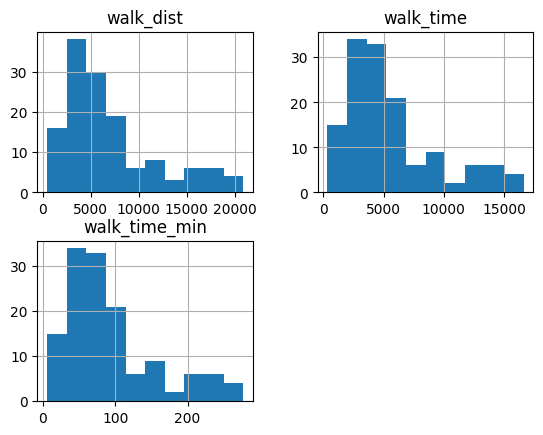

In [21]:
com_df.hist()

In [22]:
com_df.sort_values('walk_time_min', ascending=False)

start            end  walk_dist  walk_time  walk_time_min
84         쁘띠빠리           엘림제과      20900      16619     276.983333
93       수제빵연구소           엘림제과      20840      16562     276.033333
24        듀팡과자점           엘림제과      20386      16234     270.566667
9         꼬망스케익           엘림제과      20020      15839     263.983333
63         몽상가인           엘림제과      18134      14436     240.600000
..          ...            ...        ...        ...            ...
124  주식회사 호도원본점        파스텔베이커리        793        687      11.450000
125  주식회사 호도원본점  할머니 학화호도과자 본점        646        554       9.233333
113      시바앙과자점        파스텔베이커리        675        547       9.116667
114      시바앙과자점  할머니 학화호도과자 본점        527        412       6.866667
135     파스텔베이커리  할머니 학화호도과자 본점        454        346       5.766667

[136 rows x 5 columns]

In [38]:
ex.box(com_df, x='walk_time_min', points='all')

In [25]:
# 도보 소요시간 15분 미만
com_df[com_df['walk_time_min'] < 20]

start            end  walk_dist  walk_time  walk_time_min
20        듀팡과자점           쁘띠빠리        841        696      11.600000
42      뚜쥬루돌가마점     천안옛날호두과자본점       1398       1077      17.950000
109      시바앙과자점     주식회사 호도원본점       1173        966      16.100000
113      시바앙과자점        파스텔베이커리        675        547       9.116667
114      시바앙과자점  할머니 학화호도과자 본점        527        412       6.866667
124  주식회사 호도원본점        파스텔베이커리        793        687      11.450000
125  주식회사 호도원본점  할머니 학화호도과자 본점        646        554       9.233333
135     파스텔베이커리  할머니 학화호도과자 본점        454        346       5.766667

- 듀팡과자점, 쁘띠빠리
- 뚜쥬루돌가마점, 천안옛날호두과자본점
- 시바앙과자점, 주식회사 호도원 본점, 파스텔베이커리, 할머니 학화호도과자 본점, 주식회사 호도원본점

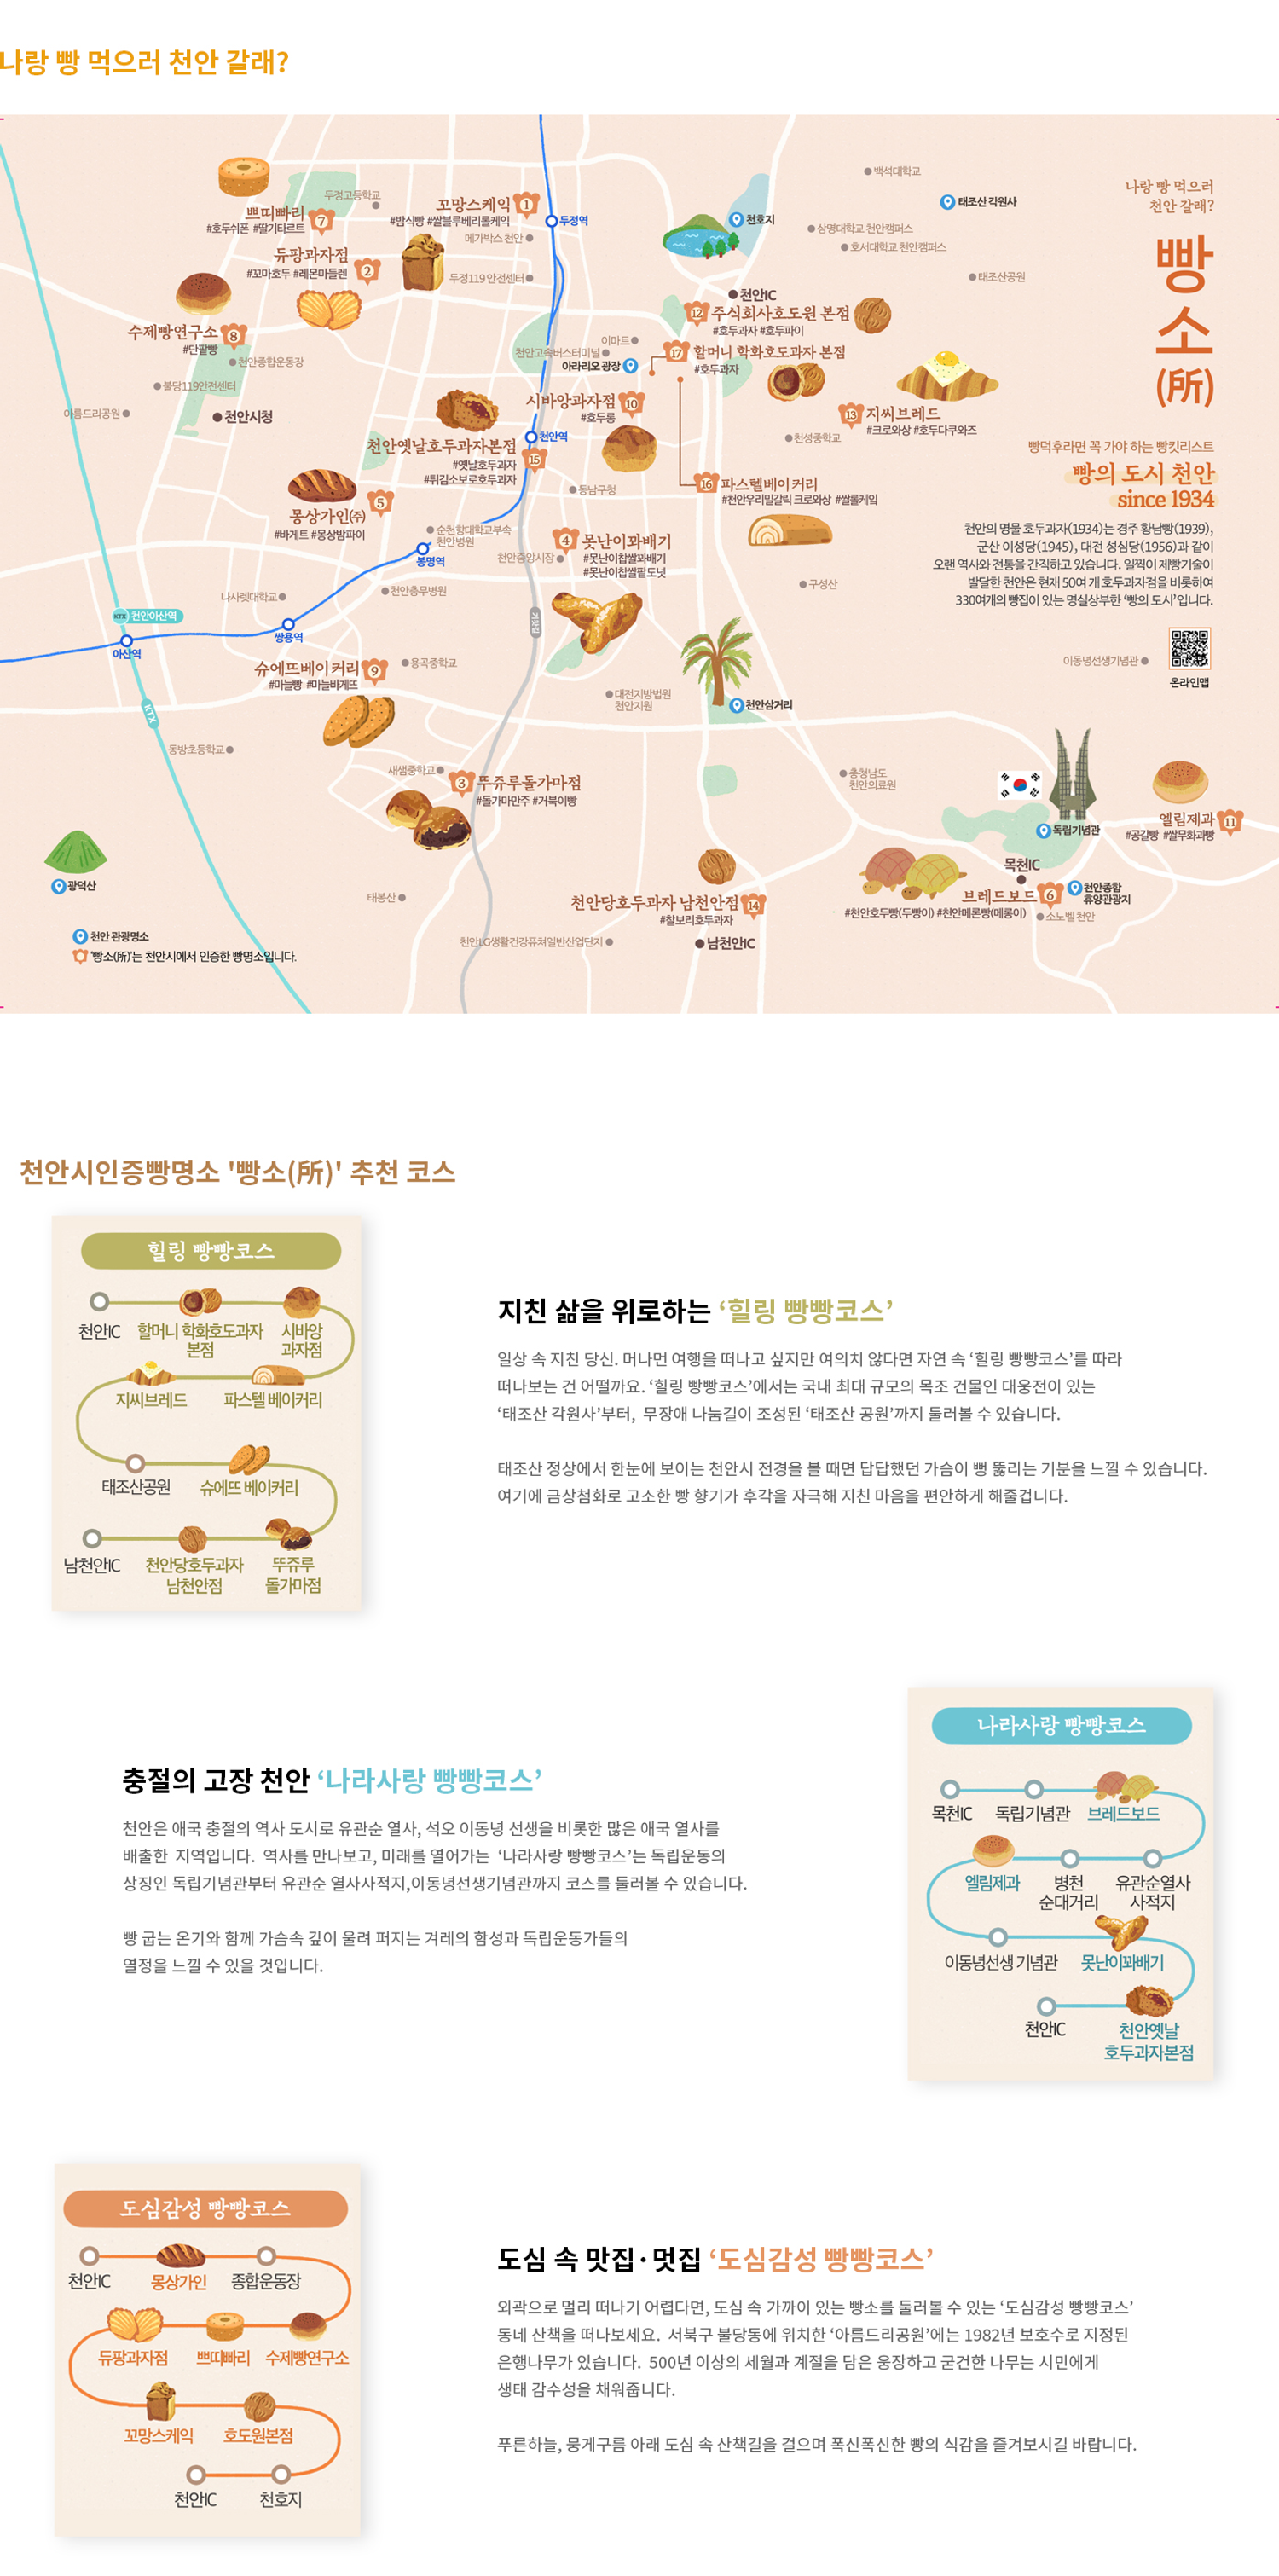

In [27]:
# 자동차 경로
def driving_path(start, end):
  url = "https://apis.openapi.sk.com/tmap/routes?version=1&callback=function"
  payload = {
      "startX": str(start.long),
      "startY": str(start.lat),
      "angle": 20,
      "speed": 30,
      "endPoiId": "10001",
      "endX": str(end.long),
      "endY": str(end.lat),
      "reqCoordType": "WGS84GEO",
      "startName": start.name,
      "endName": end.name,
      "searchOption": "2",  # 교통최적+최소시간
      "resCoordType": "WGS84GEO",
      "sort": "index",
      "lang": 0,
      "format": "json",
      "count": 10,
      "tollgateFareOption": 16,
      "roadType": 32,
      "directionOption": 1,
      "endRpFlag": "G",
      "gpsTime": "20191125153000",
      "uncetaintyP": 1,
      "uncetaintyA": 1,
      "uncetaintyAP": 1,
      "carType": 0,
      "gpsInfoList": "126.939376564495,37.470947057194365,120430,20,50,5,2,12,1_126.939376564495,37.470947057194365,120430,20,50,5,2,12,1",
      "detailPosFlag": "2"
  }
  headers = {
      "accept": "application/json",
      "appKey": tmap_appkey,
      "content-type": "application/json"
  }

  response = requests.post(url, json=payload, headers=headers)

  tmp = json.loads(response.text)

  try:
    dist = tmp['features'][0]['properties']['totalDistance']
    time = tmp['features'][0]['properties']['totalTime']

    row = {'start':start.name, 'end':end.name, 'car_dist':dist, 'car_time':time}
  except:
    row = {'start':start.name, 'end':end.name, 'car_dist':None, 'car_time':None}

  return row

In [28]:
for c1, c2 in combinations(pan_df.itertuples(), 2):
    row = driving_path(c1, c2)
    com_df.loc[(com_df['start']==row['start']) & (com_df['end']==row['end']), 'car_dist'] = row['car_dist']
    com_df.loc[(com_df['start']==row['start']) & (com_df['end']==row['end']), 'car_time'] = row['car_time']

In [32]:
com_df = com_df.assign(car_time_min=com_df['car_time']/60)

In [35]:
com_df[com_df['walk_time_min'] >= 20][['car_dist', 'car_time_min']].describe()

car_dist  car_time_min
count    128.000000    128.000000
mean    9415.835938     15.373958
std     5913.114238      5.455001
min     1749.000000      5.700000
25%     4725.000000     11.295833
50%     7169.500000     14.641667
75%    13051.000000     17.862500
max    25487.000000     33.400000

<Axes: >

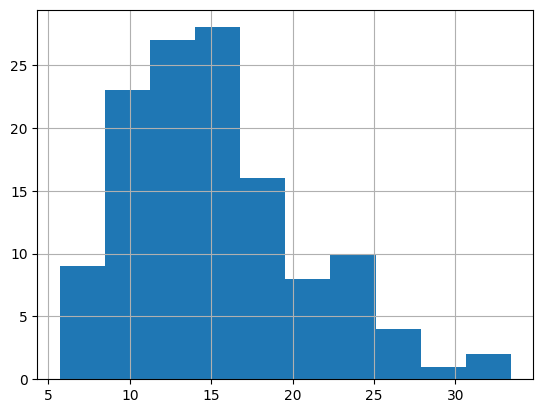

In [34]:
com_df[com_df['walk_time_min'] >= 20]['car_time_min'].hist()

In [37]:
ex.box(com_df[com_df['walk_time_min'] >= 20], x='car_time_min', points='all')

### 폐건물과 주요 피쳐들간의 거리

In [195]:
transit_df = pd.DataFrame()
for building in building_df.itertuples():
    for pan in pan_df.itertuples():
        row = driving_path(pan, building)
        transit_df = pd.concat([transit_df, pd.DataFrame([row])], ignore_index=True)

In [77]:
plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] =False

array([[<Axes: title={'center': '두정동 폐공사장'}>,
        <Axes: title={'center': '삼룡동 폐건물'}>],
       [<Axes: title={'center': '쌍용동 폐공장'}>, <Axes: >]], dtype=object)

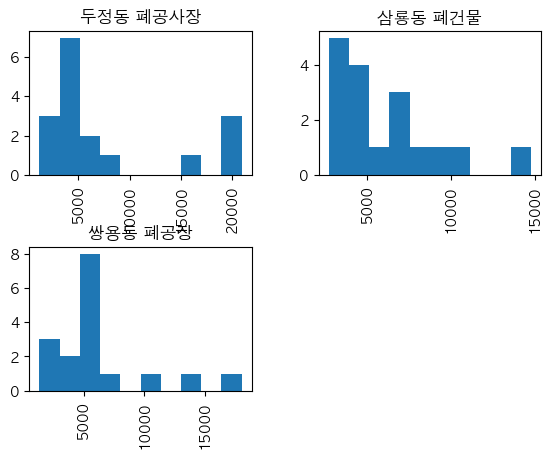

In [197]:
transit_df.hist(by='end', column='car_dist')

array([[<Axes: title={'center': '두정동 폐공사장'}>,
        <Axes: title={'center': '삼룡동 폐건물'}>],
       [<Axes: title={'center': '쌍용동 폐공장'}>, <Axes: >]], dtype=object)

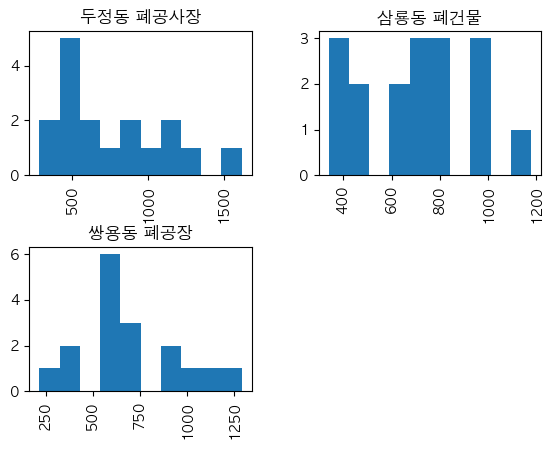

In [198]:
transit_df.hist(by='end', column='car_time')

In [199]:
transit_df.groupby('end').apply(pd.Series.describe).reset_index()\
    .pivot_table(columns='end', index='level_1', values='car_dist')\
        .drop(index='count').style.background_gradient(axis=1)

/var/folders/ky/h5cjl7dj2y9cj2mn9cv958kc0000gn/T/ipykernel_3815/3753044954.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [200]:
transit_df.groupby('end').apply(pd.Series.describe).reset_index()\
    .pivot_table(columns='end', index='level_1', values='car_time')\
        .drop(index='count').style.background_gradient(axis=1)

/var/folders/ky/h5cjl7dj2y9cj2mn9cv958kc0000gn/T/ipykernel_3815/672997098.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [157]:
infra_dist = pd.DataFrame()
for building in building_df.itertuples():
    for infra in infra_df.itertuples():
        row = driving_path(infra, building)
        infra_dist = pd.concat([infra_dist, pd.DataFrame([row])], ignore_index=True)

In [203]:
infra_dist.groupby('end').apply(pd.Series.describe).reset_index()\
    .pivot_table(columns='end', index='level_1', values='car_dist')\
        .drop(index='count').style.background_gradient(axis=1)

/var/folders/ky/h5cjl7dj2y9cj2mn9cv958kc0000gn/T/ipykernel_3815/1568634661.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [204]:
infra_dist.groupby('end').apply(pd.Series.describe).reset_index()\
    .pivot_table(columns='end', index='level_1', values='car_time')\
        .drop(index='count').style.background_gradient(axis=1)

/var/folders/ky/h5cjl7dj2y9cj2mn9cv958kc0000gn/T/ipykernel_3815/1710555908.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



array([[<Axes: title={'center': '두정동 폐공사장'}>,
        <Axes: title={'center': '삼룡동 폐건물'}>],
       [<Axes: title={'center': '쌍용동 폐공장'}>, <Axes: >]], dtype=object)

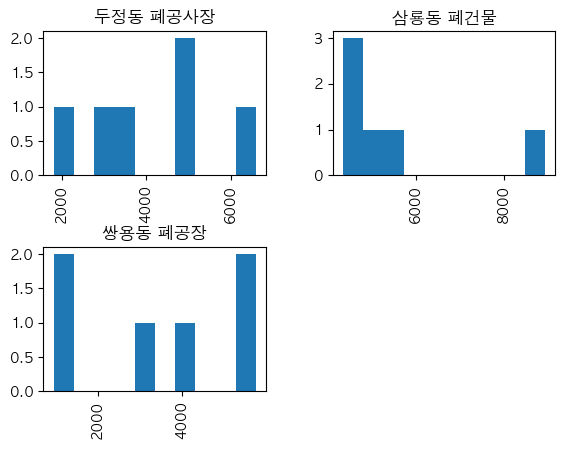

In [206]:
infra_dist.hist(by='end', column='car_dist')

array([[<Axes: title={'center': '두정동 폐공사장'}>,
        <Axes: title={'center': '삼룡동 폐건물'}>],
       [<Axes: title={'center': '쌍용동 폐공장'}>, <Axes: >]], dtype=object)

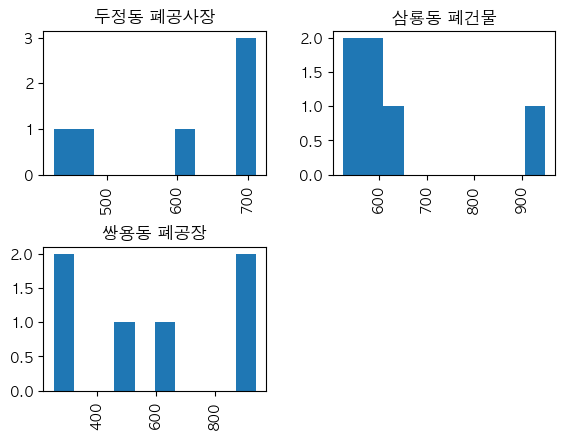

In [207]:
infra_dist.hist(by='end', column='car_time')

In [208]:
loc_df = infra_dist.pivot_table(index='end', columns='start', values='car_dist').reset_index().set_index('end')
loc_df

start        두정역     봉명역     쌍용역  천안고속버스터미널   천안아산역  천안역 1호선
end                                                         
두정동 폐공사장  1808.0  5090.0  5028.0     3206.0  6594.0   3311.0
삼룡동 폐건물   5675.0  4641.0  5089.0     4344.0  8946.0   4529.0
쌍용동 폐공장   5757.0   973.0   944.0     5548.0  3899.0   2872.0

In [209]:
loc_df['빵소_dist_mean']= transit_df.groupby('end').car_dist.mean()
loc_df['빵소_dist_max']= transit_df.groupby('end').car_dist.max()
loc_df['빵소_dist_min']= transit_df.groupby('end').car_dist.min()
loc_df['빵소_dist_median']= transit_df.groupby('end').car_dist.median()

In [182]:
loc_df

start        두정역     봉명역     쌍용역  천안고속버스터미널   천안아산역  천안역 1호선  빵소_dist_mean  \
end                                                                          
두정동 폐공사장  1808.0  5090.0  5028.0     3206.0  6594.0   3311.0   7033.647059   
삼룡동 폐건물   5675.0  4641.0  5089.0     4344.0  8946.0   4529.0   6199.235294   
폐공장       5757.0   973.0   944.0     5548.0  3899.0   2872.0   6279.352941   

start     빵소_dist_max  빵소_dist_min  빵소_dist_median  
end                                                 
두정동 폐공사장        20927         1181          4232.0  
삼룡동 폐건물         14791         2698          4903.0  
폐공장             18048         1234          5341.0

In [183]:
tmp = pd.read_excel('./지표 데이터 셋.xlsx')
tmp = tmp.set_index('index')

In [210]:
loc_df = pd.concat([loc_df, tmp], axis=1)
loc_df

두정역     봉명역     쌍용역  천안고속버스터미널   천안아산역  천안역 1호선  빵소_dist_mean  \
두정동 폐공사장  1808.0  5090.0  5028.0     3206.0  6594.0   3311.0   7565.117647   
삼룡동 폐건물   5675.0  4641.0  5089.0     4344.0  8946.0   4529.0   6157.000000   
쌍용동 폐공장   5757.0   973.0   944.0     5548.0  3899.0   2872.0   6318.470588   

          빵소_dist_max  빵소_dist_min  빵소_dist_median  버스 정류장  지하철역  주차장  주유소  \
두정동 폐공사장        20927         1181          4981.0      36     1    8   17   
삼룡동 폐건물         14791         2698          4909.0      26     0    6   16   
쌍용동 폐공장         18048         1329          5341.0      41     2   19   18   

          음식점(2km)  오락시설(2km)  숙박시설(2km)  편의시설(2km)  관광시설(2km)  관광시설(10km)  
두정동 폐공사장      2081         14         49        150          1          15  
삼룡동 폐건물        133          5         27         14          3          18  
쌍용동 폐공장       1334         11         62         64          0          16

In [211]:
loc_df.columns

Index(['두정역', '봉명역', '쌍용역', '천안고속버스터미널', '천안아산역', '천안역 1호선', '빵소_dist_mean',
       '빵소_dist_max', '빵소_dist_min', '빵소_dist_median', '버스 정류장', '지하철역', '주차장',
       '주유소', '음식점(2km)', '오락시설(2km)', '숙박시설(2km)', '편의시설(2km)', '관광시설(2km)',
       '관광시설(10km)'],
      dtype='object')

In [212]:
loc_df.columns = ['두정역_dist', '봉명역_dist', '쌍용역_dist',
 '천안고속버스터미널_dist', '천안아산역_dist', '천안역 1호선_dist',
 '빵소_dist_mean', '빵소_dist_max', '빵소_dist_min', '빵소_dist_median',
 '버스 정류장', '지하철역', '주차장', '주유소', '음식점',
 '오락시설', '숙박시설', '편의시설', '관광시설', '관광시설'
 ]

In [214]:
loc_df.to_csv('./0816.csv')